In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Medical.csv')

In [3]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [4]:
# Add 'overweight' column
df.loc[df['weight']/(df['height']/100)**2 > 25, 'overweight'] = 1
df.loc[df['weight']/(df['height']/100)**2 <= 25, 'overweight'] = 0

In [5]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,1.0


In [6]:
# Normalize data by making 0 always good and 1 always bad. If the value of 'cholestorol' or 'gluc' is 1, make the value 0. If the value is more than 1, make the value 1.
df.loc[df['cholesterol']==1, 'cholesterol'] = 0
df.loc[df['cholesterol']>1, 'cholesterol'] = 1
    

In [7]:
df.loc[df['gluc']==1, 'gluc'] = 0
df.loc[df['gluc']>1, 'gluc'] = 1
    

In [8]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,1.0
69996,99995,22601,1,158,126.0,140,90,1,1,0,0,1,1,1.0
69997,99996,19066,2,183,105.0,180,90,1,0,0,1,0,1,1.0
69998,99998,22431,1,163,72.0,135,80,0,1,0,0,0,1,1.0


In [9]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,0,0,0,0,1,0,0.0
1,1,20228,1,156,85.0,140,90,1,0,0,0,1,1,1.0
2,2,18857,1,165,64.0,130,70,1,0,0,0,0,1,0.0
3,3,17623,2,169,82.0,150,100,0,0,0,0,1,1,1.0
4,4,17474,1,156,56.0,100,60,0,0,0,0,0,0,0.0


In [10]:
import seaborn as sns

In [11]:
 # Create DataFrame for cat plot using `pd.melt` using just the values from 'cholesterol', 'gluc', 'smoke', 'alco', 'active', and 'overweight'.
new_df=pd.melt(df,id_vars=['cardio'],value_vars=['cholesterol','gluc','smoke','alco','active'])
new_df['tot']=1
new_df= new_df.groupby(['variable', 'cardio', 'value'], as_index=False).count()


In [12]:
new_df

,variable,cardio,value,tot
0,active,0,0,6378
1,active,0,1,28643
2,active,1,0,7361
3,active,1,1,27618
4,alco,0,0,33080
5,alco,0,1,1941
6,alco,1,0,33156
7,alco,1,1,1823
8,cholesterol,0,0,29330
9,cholesterol,0,1,5691


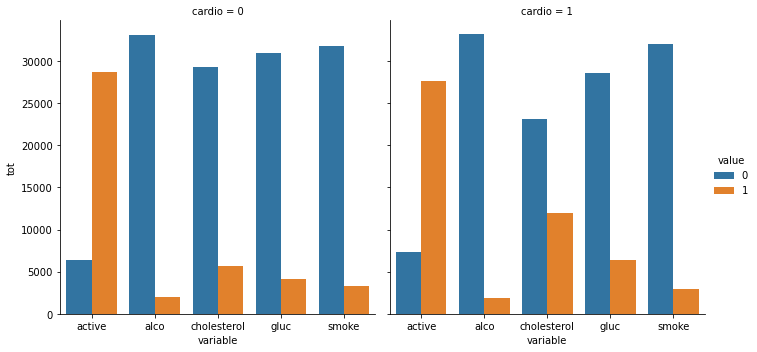

In [13]:
 # Group and reformat the data to split it by 'cardio'. Show the counts of each feature. You will have to rename one of the collumns for the catplot to work correctly.
plots = sns.catplot( x = 'variable',y = 'tot', col = 'cardio',hue = 'value',kind = 'bar',data = new_df)
fig = plots.fig
    

In [14]:
# Draw Heat Map
df_clean=df[
      (df['ap_lo'] <= df['ap_hi'])
      & (df['height'] >= df['height'].quantile(0.025))
      & (df['height'] <= df['height'].quantile(0.975))
      & (df['weight'] >= df['weight'].quantile(0.025))
      & (df['weight'] <= df['weight'].quantile(0.975))
      ]

In [15]:
# Calculate the correlation matrix
heat_corr=df_clean.corr()

In [16]:
 # Generate a mask for the upper triangle
mask = np.zeros_like(heat_corr)
mask[np.triu_indices_from(mask)] = True

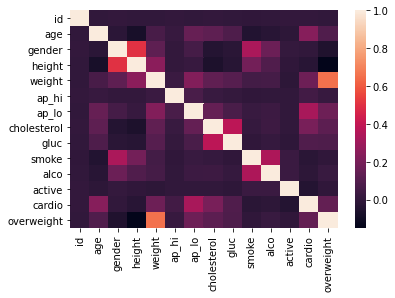

In [17]:
sns.heatmap(heat_corr)

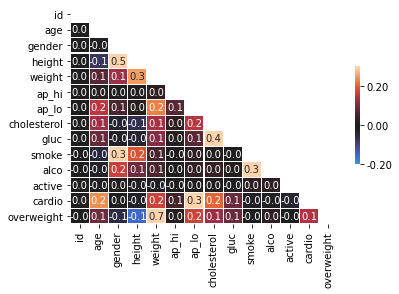

In [18]:
 ax = sns.heatmap(
      heat_corr,
      linewidths=.2,
      annot=True,
      fmt='.1f',
      mask=mask,
      
      center=0,
      vmin=-0.2,
      vmax=0.30,
      cbar_kws={'shrink':.45, 'format':'%.2f'}
      )